In [1]:
import sys
import os
import random
import zipfile
import nibabel as nib 
import numpy as np


In [3]:
img_path = "/Users/ephraimmeiri/gitEtc/MSK-Capstone/300_cases/case_00000/imaging.nii.gz"
img = nib.load(img_path)
data = img.get_fdata()
nx, ny, nz = data.shape

In [5]:
crop1a = data[0:256, 0:int(ny/2), 0:256]
crop1b = data[0:256, int(ny/2):, 0:256]

In [17]:
def view_data(data, img):
    # Display the image using nibabel's viewer
    img = nib.Nifti1Image(data, img.affine, img.header)
    nib.viewers.OrthoSlicer3D(data)

In [6]:
def save_data(data,img, path):
    img = nib.Nifti1Image(data, img.affine, img.header)
    # Per Claude: When you save the cropped image, nibabel will automatically update the relevant header fields (e.g., image dimensions) based on the cropped data.
    # If things aren't working, this is a good place to start debugging.
    nib.save(img, path)

In [8]:
save_data(crop1a, img, "Case_0_imaging_crop1a.nii.gz")

In [23]:
nx,nx/2

(256, 128.0)

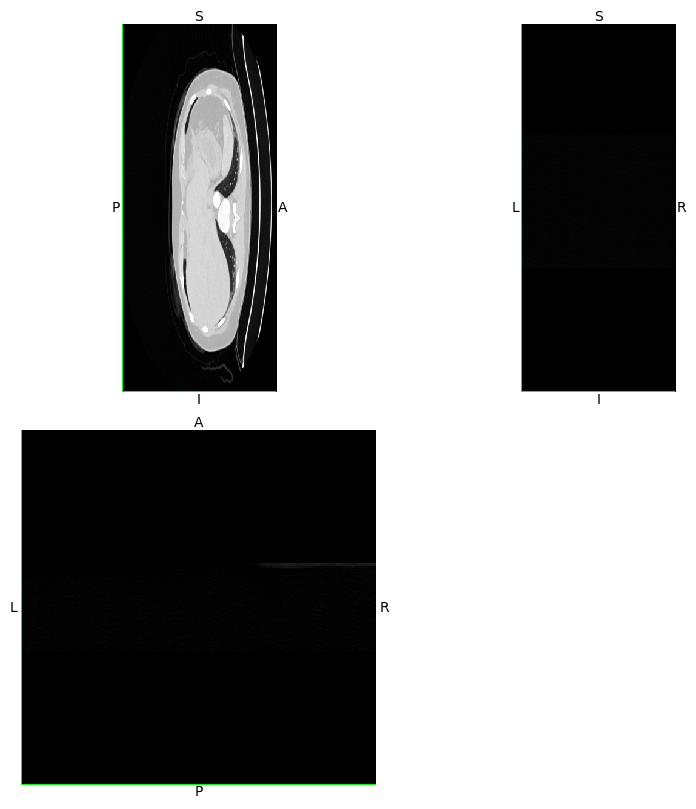

In [25]:
view_data(data, img)

In [26]:
hx,hy,hz = int(nx/2), int(ny/2), int(nz/2)
save_data(data[:,:,:hz], img, "Case_0_imaging_crop2a.nii.gz")

In [40]:
input_dir = "/Users/ephraimmeiri/gitEtc/MSK-Capstone/300_casesUNCROPPED"
subdirs = [os.path.join(input_dir, d) for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]
for subdir in subdirs:
    img_path = os.path.join(subdir, "imaging.nii.gz")
    seg_path = os.path.join(subdir, "segmentation.nii.gz")
    seg = nib.load(seg_path)
    img = nib.load(img_path)
    seg_data = seg.get_fdata()
    data = img.get_fdata()
    nx, ny, nz = data.shape
    hz=int(nz/2)
    crop1a = data[:, :, 0:hz]
    crop1b = data[:, :, hz:nz]
    dir = "/Users/ephraimmeiri/gitEtc/MSK-Capstone/300_CroppedCases1/"
    case = subdir.split("/")[-1]
    right_case = "case_"+str((int(case.split("_")[-1])+589)).zfill(5)
    if not os.path.exists(os.path.join(dir, right_case)):
        os.makedirs(os.path.join(dir, right_case))
    if not os.path.exists(os.path.join(dir, case)):
        os.makedirs(os.path.join(dir, case))
    save_data(crop1a, img, os.path.join(dir, case+"/","imaging.nii.gz"))
    save_data(crop1b, img, os.path.join(dir, right_case+"/","imaging.nii.gz"))
    hx,hy,hz = int(nx/2), int(ny/2), int(nz/2)
    save_data(seg_data[:,:,:hz], img, os.path.join(dir, case+"/","segmentation.nii.gz"))
    save_data(seg_data[:,:,hz:], img, os.path.join(dir, right_case+"/","segmentation.nii.gz"))